### 以陆圩村为例，进行防返贫分析

In [1]:
### 导入用电数据
import pandas as pd
import numpy as np
uuserinfo = pd.read_excel("1.陆圩村用户信息表.xlsx")
data = pd.read_excel("2.陆圩村用户日电量表.xlsx")

In [13]:
print("陆圩村总共的用户数量：",len(set(data["客户编号"])))

总共的用户数量： 264


In [25]:
print("陆圩村数据有效的用户数量：",sum(data.groupby(data["客户编号"]).count()["日期"] >= 1350))

陆圩村数据有效的用户数量： 244


### 获得有效用户的用户编号

In [2]:
used_num = data.groupby(data["客户编号"]).count()["日期"] >= 1350
index = np.array(used_num.index)
used_index = index[used_num]

### 提取数据，分析2019年用户的平均用电水平和2021年平均用电水平
### 分析用户用电量的方差和均值，
方差决定波动情况，太低为空置，

In [98]:
std19_lists = []
mean19_lists = []
for i in range(len(used_index)):
    std19_list = []
    mean19_list = []
    for j in range(12):
        power = data[data["客户编号"] == used_index[i]][0+30*j:30+30*j]["电量"]
        std19_list.append(power.std())
        mean19_list.append(power.mean())
    std19_lists.append(std19_list)   
    mean19_lists.append(mean19_list)  


std22_lists = []
mean22_lists = []
for i in range(len(used_index)):
    std22_list = []
    mean22_list = []   
    for j in range(9):
        power = data[data["客户编号"] == used_index[i]][-286+30*j:-286+30*j+30]["电量"]
        std22_list.append(power.std())
        mean22_list.append(power.mean())
    std22_lists.append(std22_list)   
    mean22_lists.append(mean22_list)      

In [99]:
std19 = np.array(std19_lists)
mean19 = np.array(mean19_lists)
print(std19.shape)

std22 = np.array(std22_lists)
mean22 = np.array(mean22_lists)
print(std22.shape)

(244, 12)
(244, 9)


### 将空置的用户剔除，基本不用电的用户

[0.7701, 0.7764000000000002, 0.4986666666666667, 0.5231333333333332, 0.4933666666666666, 0.7106666666666667, 0.7666666666666667, 1.461200000000001, 0.4826666666666667]
[1.8259333333333336, 1.7436666666666665, 1.5663333333333334, 1.4760666666666664, 1.4105333333333334, 2.495, 2.7529999999999997, 3.9728000000000008, 1.6393333333333335]
[40, 41, 49, 50, 46, 43, 43, 44, 43]


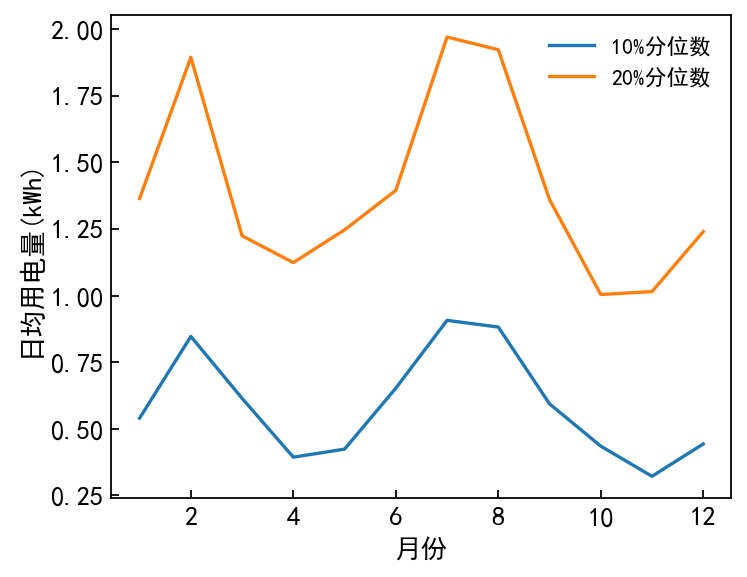

In [187]:
# 对19年每个月数据分析，剔除掉基本不用电的用户，并画出每个月的分位数图
per19_10 = []
per19_20 = []
for i in range(12):
    month_mean = mean19[:,i]
    # 当月的非空置用户
    nvh19 = (month_mean >= 0.01)
    # 求取分位数
    per19_10.append(np.percentile(month_mean[nvh19],10))
    per19_20.append(np.percentile(month_mean[nvh19],20))
    

per22_10 = []
per22_20 = []
vhnum = []
for i in range(9):
    month_mean = mean22[:,i]
    # 当月的非空置用户
    nvh22 = (month_mean >= 0.01)
    vhnum.append(sum(month_mean <= 0.01))
    # 求取分位数
    per22_10.append(np.percentile(month_mean[nvh22],10))
    per22_20.append(np.percentile(month_mean[nvh22],20))

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
"font.family":"serif",    
"font.size": 12,
"mathtext.fontset":'stix',
"font.serif": 'SimHei',
"xtick.direction":"in",
"ytick.direction":"in",
}
rcParams.update(config)

plt.figure(figsize=(5,4), dpi=160)
plt.plot(np.arange(1,13),per19_10)
plt.plot(np.arange(1,13),per19_20)
plt.xlabel("月份")
plt.ylabel("日均用电量(kWh)")
plt.legend(['10%分位数','20%分位数'],frameon=False, fontsize = 'small',loc="best")
#plt.xlim([0,20])
print(per22_10)
print(per22_20)
print(vhnum)

###  绘制分布19年和22年比较

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


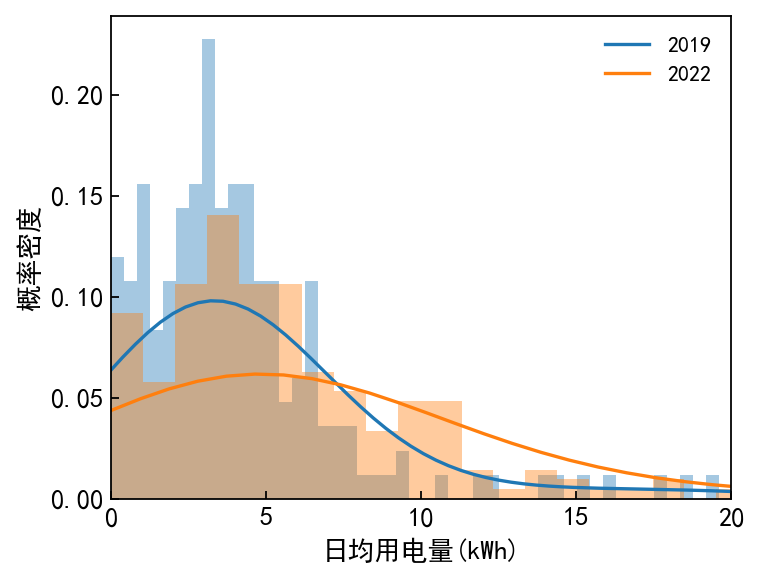

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
"font.family":"serif",    
"font.size": 12,
"mathtext.fontset":'stix',
"font.serif": 'SimHei',
"xtick.direction":"in",
"ytick.direction":"in",
}
rcParams.update(config)

plt.figure(figsize=(5,4), dpi=160)
sns.distplot(np.array(mean19_lists).mean(1)[nvh19],bins=150)
sns.distplot(np.array(mean22_lists).mean(1)[nvh22],bins=150)
plt.xlabel("日均用电量(kWh)")
plt.ylabel("概率密度")
plt.xlim([0,20])
plt.legend(['2019','2022'],frameon=False, fontsize = 'small',loc="upper right")

### 预警用户求取

In [154]:
# 
red_num = []
yellow_num = []
blue_num = []
for i in range(9):
    month_data = mean22[:,i]
    red_num.append(sum((month_data < min(per19_10[i],per22_10[i])) & (month_data > 0.01)))

    yellow_num.append( sum( (month_data < max(per19_10[i],per22_10[i])) & (month_data > min(per19_10[i],per22_10[i]))))

    blue_num.append(sum((month_data > max(per19_10[i],per22_10[i])) & (month_data < per22_20[i])))

print(red_num)
print(yellow_num)
print(blue_num)

[16, 21, 20, 16, 17, 20, 20, 17, 20]
[5, 4, 2, 4, 3, 0, 2, 3, 1]
[20, 16, 17, 19, 20, 19, 17, 20, 18]


In [163]:
# 9月具体用户编号
month_data = mean22[:,8]
red_id = used_index[(month_data < min(per19_10[i],per22_10[i])) & (month_data > 0.01)]
yellow_id = used_index[(month_data < max(per19_10[i],per22_10[i])) & (month_data > min(per19_10[i],per22_10[i]))]
bule_id = used_index[(month_data > max(per19_10[i],per22_10[i])) & (month_data < per22_20[i])]

In [168]:
bule_id

array([3201902236291, 3201903120786, 3201903152280, 3203958001804,
       3203958001812, 3203958001838, 3203958001870, 3203958001872,
       3203958001879, 3203958001880, 3203958001887, 3203958001889,
       3203958001914, 3203958001929, 3203958001930, 3203958001932,
       3203958002079, 3203958002085], dtype=int64)

In [185]:

for i in range(9):
    hir_num = []
    month_data = mean22[:,i]
    hir_num.append(sum((month_data < 0.1) & (month_data > 0.01)))
    hir_num.append(sum((month_data < 0.2) & (month_data > 0.1)))
    hir_num.append(sum((month_data < 0.3) & (month_data > 0.2)))
    hir_num.append(sum((month_data < 0.4) & (month_data > 0.3)))
    hir_num.append(sum((month_data < 0.5) & (month_data > 0.4)))
    hir_num.append(sum((month_data < 0.6) & (month_data > 0.5)))
    print(hir_num)
    print(sum(hir_num))

[7, 4, 2, 1, 1, 3]
18
[3, 6, 4, 0, 2, 3]
18
[5, 6, 3, 2, 4, 2]
22
[9, 3, 2, 2, 3, 4]
23
[9, 4, 2, 2, 4, 2]
23
[4, 5, 6, 2, 2, 0]
19
[6, 5, 0, 3, 0, 3]
17
[5, 3, 2, 2, 0, 0]
12
[9, 2, 3, 6, 1, 1]
22


0.08196721311475409

### 对分析数据分位数

In [87]:
print("19后5%用户用电量：",np.percentile(np.array(mean19_list)[nvh19],5))
print("19后10%用户用电量：",np.percentile(np.array(mean19_list)[nvh19],10))
print("19后20%用户用电量：",np.percentile(np.array(mean19_list)[nvh19],20))
print("22后10%用户用电量：",np.percentile(np.array(mean22_list)[nvh22],10))
per10 = np.percentile(np.array(mean22_list)[nvh22],10)
per20 = np.percentile(np.array(mean22_list)[nvh22],20)
print("22后20%用户用电量：",np.percentile(np.array(mean22_list)[nvh22],20))

19后5%用户用电量： 0.29435
19后10%用户用电量： 0.7991926666666667
19后20%用户用电量： 1.483266666666667
22后10%用户用电量： 1.0131118881118877
22后20%用户用电量： 2.4553006993007


### 依据准则分析2022年贫困户预警名单

In [83]:
print(sum((np.array(mean22_list)[nvh22] < per20) & (np.array(mean22_list)[nvh22] > per10)))
print(sum((np.array(mean22_list)[nvh22] < per10) & (np.array(mean22_list)[nvh22] > 0.5636)))
print(sum((np.array(mean22_list)[nvh22] < 0.56136)))

17
6
12
